## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, drp_ratio=0.3):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95
Dropout_EXP = 0.25
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 1e-16]

In [10]:
results = {}
for batch_size, regulizer_ratio in zip(BATCH_SIZE, L1_EXP):
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP, l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'batch_size_%s' % str(batch_size)
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 482s 10ms/step - loss: 4

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 67s 1ms/step - loss: 2.3960 - acc: 0.3021 - val_loss: 2.0033 - val_acc: 0.3444
Epoch 2/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.9421 - acc: 0.3577 - val_loss: 1.8684 - val_acc: 0.3763
Epoch 3/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.8575 - acc: 0.3825 - val_loss: 1.7933 - val_acc: 0.4029
Epoch 4/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.8161 - acc: 0.3948 - val_loss: 1.7945 - val_acc: 0.4081
Epoch 5/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7915 - acc: 0.4032 - val_loss: 1.7746 - val_acc: 0.4150ss: 1.7910 - acc: 0. - ETA: 0s - loss: 1.7917 - acc: - ETA: 0s - loss: 1.7918 - acc:
Epoch 6/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7732 - acc: 0.4159 - val_loss: 1.7949 - val_acc: 0.4052
Epoch 7/50
50000/50000 [====================

50000/50000 [==============================] - 32s 648us/step - loss: 1.8618 - acc: 0.3256 - val_loss: 1.7187 - val_acc: 0.3706
Epoch 2/50
50000/50000 [==============================] - 31s 626us/step - loss: 1.6777 - acc: 0.3981 - val_loss: 1.6590 - val_acc: 0.4097
Epoch 3/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.5944 - acc: 0.4255 - val_loss: 1.5692 - val_acc: 0.4413
Epoch 4/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.5406 - acc: 0.4467 - val_loss: 1.5402 - val_acc: 0.4516
Epoch 5/50
50000/50000 [==============================] - 31s 626us/step - loss: 1.4995 - acc: 0.4614 - val_loss: 1.5275 - val_acc: 0.4565 - loss: 1.4997 
Epoch 6/50
50000/50000 [==============================] - 31s 628us/step - loss: 1.4679 - acc: 0.4738 - val_loss: 1.4942 - val_acc: 0.4644
Epoch 7/50
50000/50000 [==============================] - 31s 628us/step - loss: 1.4429 - acc: 0.4837 - val_loss: 1.4790 - val_acc: 0.4760
Epoch 8/50
50000/50000

Epoch 2/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6772 - acc: 0.3997 - val_loss: 1.6479 - val_acc: 0.4151
Epoch 3/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5889 - acc: 0.4326 - val_loss: 1.5714 - val_acc: 0.4294
Epoch 4/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5321 - acc: 0.4516 - val_loss: 1.5412 - val_acc: 0.4418
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4786 - acc: 0.4714 - val_loss: 1.6068 - val_acc: 0.4300
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4454 - acc: 0.4827 - val_loss: 1.4876 - val_acc: 0.4702
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.4141 - acc: 0.4958 - val_loss: 1.4743 - val_acc: 0.4710
Epoch 8/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.3812 - acc: 0.5070 - val_loss: 1.4376 - val_acc: 0.4928
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 7s 133us/step - loss: 1.6191 - acc: 0.4214 - val_loss: 1.5757 - val_acc: 0.4380
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5612 - acc: 0.4431 - val_loss: 1.5637 - val_acc: 0.4327
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5177 - acc: 0.4593 - val_loss: 1.5087 - val_acc: 0.4652
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4686 - acc: 0.4764 - val_loss: 1.4592 - val_acc: 0.4851
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4279 - acc: 0.4914 - val_loss: 1.4992 - val_acc: 0.4600
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4149 - acc: 0.4946 - val_loss: 1.4350 - val_acc: 0.4863
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3773 - acc: 0.5071 - val_loss: 1.4261 - val_acc: 0.4942
Epoch 10/50
50000/50000 [====================

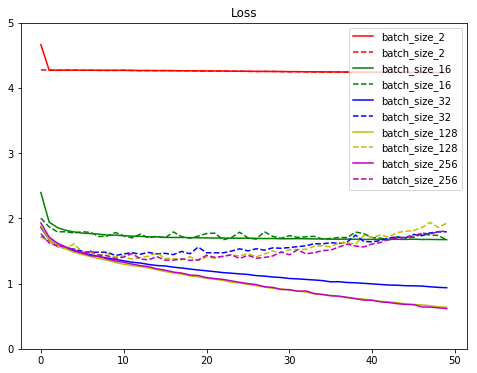

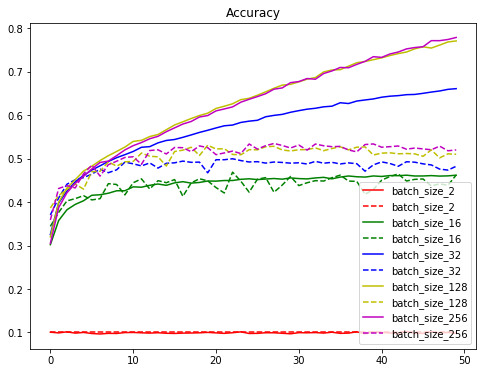

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()